In [1]:
# 5.3_break_even_analysis_with_rainbow_diagrams.ipynb
""" 5.3 Break-even Analysis with Rainbow Diagrams """
import numpy as np
import numpy_financial as npf
from scipy.optimize import root
import matplotlib.pyplot as plt

In [2]:
# Auto vs. Manual Machine
# Common data
Study_period = 10
marr = 0.12

In [3]:
# Alternative 1
InitCost1 = 50000
Life1 = 10
AnnualCost1 = 7000
SV1 = 8000
N_worker1 = 1
Labor_cost_per_hour1 = 12
Output_per_hour1 = 8

Direct_unit_labor_cost1 = N_worker1*Labor_cost_per_hour1 / Output_per_hour1

def AW1(Q):
    return (-AnnualCost1 
            - Direct_unit_labor_cost1*Q 
            - npf.pmt(marr, Life1, -InitCost1, SV1))

In [4]:
# Alternative 2
InitCost2 = 17500
Life2 = 5
AnnualCost2 = 3000
SV2 = 1000
N_worker2 = 3
Labor_cost_per_hour2 = 8
Output_per_hour2 = 6

Direct_unit_labor_cost2 = N_worker2*Labor_cost_per_hour2 / Output_per_hour2

def AW2(Q):
    return (-AnnualCost2 
            - Direct_unit_labor_cost2*Q 
            - npf.pmt(marr, Life2, -InitCost2, SV2))

In [5]:
# Base case analysis
Qbase = 2600
print(f"Base case solutions at annual quantity {Qbase}:")

print(f"  AW1({marr}) = {AW1(Qbase):,.2f}")
print(f"  AW2({marr}) = {AW2(Qbase):,.2f}")

Base case solutions at annual quantity 2600:
  AW1(0.12) = -19,293.33
  AW2(0.12) = -18,097.26


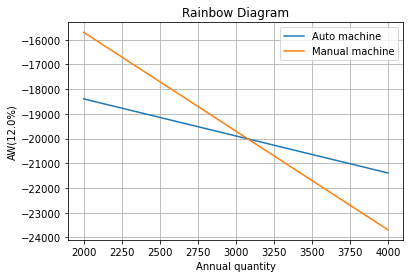

In [6]:
# Plot the rainbow diagram
x = np.linspace(2000, 4000, 100)
fig, ax = plt.subplots()
ax.plot(x, AW1(x), label='Auto machine')
ax.plot(x, AW2(x), label='Manual machine')
ax.legend()
ax.set_title("Rainbow Diagram")
ax.set_xlabel("Annual quantity")
ax.set_ylabel(f"AW({marr*100}%)")
ax.grid()
plt.show()

In [7]:
# Find breakeven quantity
guess = 3000
sol = root(lambda q: AW1(q)-AW2(q), guess)
print(f"\nBreakeven Quantity = {sol.x[0]:,.2f}")


Breakeven Quantity = 3,078.43
